Path found:
[(1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (3, 4), (3, 5), (4, 5), (5, 5)]


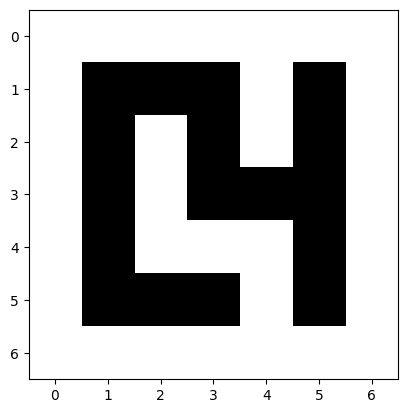

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the maze as a 2D list (1: Wall, 0: Path)
maze = [
    [1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 1],
    [1, 1, 1, 1, 1, 1, 1]
]

# Start and End points
start = (1, 1)  # (row, col)
end = (5, 5)

# Initialize visited array
visited = [[False for _ in range(len(maze[0]))] for _ in range(len(maze))]

# Movement directions (down, up, right, left)
directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

# Function to visualize the maze and DFS path
def visualize_maze(maze, path=[]):
    maze_visual = np.array(maze)
    for r, c in path:
        maze_visual[r][c] = 0.5  # Mark the path with 0.5 for visualization

    plt.imshow(maze_visual, cmap='gray')
    plt.show()

# DFS function to solve the maze
def dfs(maze, start, end, path):
    x, y = start
    # If we reached the end
    if start == end:
        path.append(end)
        return True

    # Mark the current cell as visited
    visited[x][y] = True
    path.append((x, y))

    # Explore neighbors
    for direction in directions:
        next_x, next_y = x + direction[0], y + direction[1]
        if 0 <= next_x < len(maze) and 0 <= next_y < len(maze[0]):  # Check boundaries
            if not visited[next_x][next_y] and maze[next_x][next_y] == 0:
                if dfs(maze, (next_x, next_y), end, path):
                    return True

    # If no path found, backtrack
    path.pop()
    return False

# Solve the maze using DFS
path = []
if dfs(maze, start, end, path):
    print("Path found:")
    print(path)
    visualize_maze(maze, path)
else:
    print("No path found.")
